[Text(0, 10.0, '$10^1$'), Text(0, 5.0, '$5\\cdot10$'), Text(0, 10.0, '$10^1$'), Text(0, 20.0, '$2\\cdot 10^1$')]


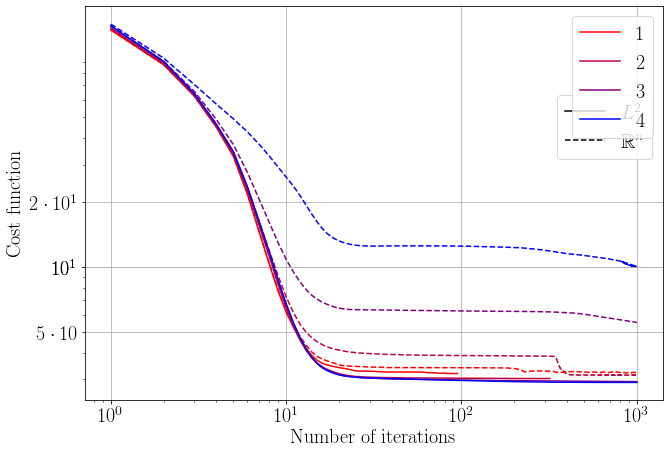

In [13]:
from signac import get_project
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import re
import itertools


plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    "font.size" : 20
})


project = get_project("./")

#from init import nrefs
nrefs = [1, 2, 3, 4]
jobs_balance = list(project.find_jobs({'nref': {'$lt' : 5, '$gt': 0}}))
jobs_balance.sort(key=lambda job: job.sp.nref)
_, ax = plt.subplots()

colors = {1: 'red', 2: '#bf0040', 3:  '#800080', 4: 'b'}
#colors = {1: 'red', 2: '#bf0040', 3:  'b'}
lines = {"L2": '-', "euclidean": '--'}
cc = itertools.cycle(colors)
plot_lines = {"L2": [], "euclidean": []}

for job in jobs_balance:
    if job.sp.get('eps_approach'):
        if job.sp['eps_approach'] == 'lb':
            continue
    
    nref = job.sp.nref

    def read_output(output_file):
        obj_iteration_history_current = []
        iter_history_current = []

        with open(output_file, "r") as L2_file:
            for line in L2_file:
                obj_iteration = re.findall("obj: (-?[0-9]\d*)(\.\d+)?(e-?\+?\d*)?", line)
                current_it = re.findall("^It: (\d+)", line)
                if current_it:
                    iter_history_current.append(int(current_it[0]))
                if obj_iteration:
                    obj_it_float = float(obj_iteration[0][0] + obj_iteration[0][1] + obj_iteration[0][2])
                    obj_iteration_history_current.append(obj_it_float)

        return obj_iteration_history_current, iter_history_current
    
    color = colors[nref]

    output_file = f"{job.ws}/output_{job.sp.nref}_{job.sp.inner_product}.txt"
    obj_history, iter_history = read_output(output_file)
    l1, = plt.loglog(iter_history, obj_history, lines[job.sp.inner_product], color=color, label=f"${nref}$")
    plot_lines[job.sp.inner_product].append(l1)


ax.set_xlabel('$\\textrm{Number of iterations}$', fontsize=20)
ax.set_ylabel('$\\textrm{Cost function}$', fontsize=20)
plt.setp(ax.get_xticklabels(), usetex=True)
plt.setp(ax.get_yticklabels(), usetex=True)
my_yticks = (np.array([10, 5.e+00, 1.e+01, 2e1]), 
            ['10$', '$5\cdot10$','$10^1$', '$2\cdot 10^1$'])

plt.yticks(my_yticks[0], my_yticks[1])

plt.grid(True)

# Building the artificial handles for the legend
lss = ['-', '--']
colors_str = ['red', '#bf0040', '#800080', 'b']
f = lambda ls,c: plt.plot([],[],linestyle=ls, color=c,)[0]
handles_cs = [f("-", colors_str[i]) for i in range(4)]
handles_ls = [f(lss[i], "k") for i in range(2)]
labels_ls = ["$L^2$", "$\mathbb{R}^n$"]
labels_cs = ['$1$','$2$','$3$','$4$']

legend1 = plt.legend(handles_ls, labels_ls, loc="upper left", bbox_to_anchor=(0.8, 0.8))
plt.gca().add_artist(legend1)
plt.legend(handles_cs, labels_cs, loc=1)

fig = plt.gcf()
fig.set_size_inches(10.37, 7.25)

print(ax.get_yticklabels())
tikz = False
if tikz:
    from tikzplotlib import save as tikz_save


    tikz_save(
        "./convergence_plots.tex",
        axis_height="\\figureheight",
        axis_width="\\figurewidth",
    )
else:

    plt.savefig(
        "./convergence_plots.pdf",
        dpi=1600,
        format=None,
        transparent=True,
        bbox_inches="tight",
    )


In [10]:
import matplotlib
matplotlib.colors.to_rgb('r')

(1.0, 0.0, 0.0)